# WHO HIV Dataset

In [9]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
# if needed: pip install requests or conda install requests
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
requests.__path__

['/Users/kelvin/anaconda3/lib/python3.7/site-packages/requests']

## HIV cases / retroviral (by country and region)

In [10]:
url = 'https://apps.who.int/gho/athena/data/GHO/HIV_0000000001,HIV_0000000009,HIV_ARTCOVERAGE.html?profile=ztable'
response = requests.get(url)
page = response.text
#WebScrap Beautifulsoup
soup = BeautifulSoup(page, "html.parser")

In [11]:
#Parsing and creading list of strings
article_values = [entry.text for entry in soup.find_all('td')]

In [12]:
#Columns in dataset
columns = ["GHO", "PUBLISH_STATE", "YEAR", "REGION", "COUNTRY", "DISPLAY_VALUE", "NUMERIC_VALUE", "LOW_RANGE", "HIGH_RANGE", "COMMENT"]

## Reading List to DICT

In [13]:
from collections import defaultdict

article_dict = defaultdict(list)

for idx, article_value in enumerate(article_values):
    if idx % 10 == 0:
        for i in range(9):
            article_dict[columns[i]].append(article_values[idx+i])

In [406]:
# from collections import defaultdict

# article_dict = defaultdict(list)

# for idx, article_value in enumerate(article_values):
#     if idx % 10 == 0:
#         article_dict[columns[0]].append(article_value)
#         article_dict[columns[1]].append(article_values[idx+1])
#         article_dict[columns[2]].append(article_values[idx+2])
#         article_dict[columns[3]].append(article_values[idx+3])
#         article_dict[columns[4]].append(article_values[idx+4])
#         article_dict[columns[5]].append(article_values[idx+5])
#         article_dict[columns[6]].append(article_values[idx+6])
#         article_dict[columns[7]].append(article_values[idx+7])
#         article_dict[columns[8]].append(article_values[idx+8])

# article_dict.keys()

dict_keys(['GHO', 'PUBLISH_STATE', 'YEAR', 'REGION', 'COUNTRY', 'DISPLAY_VALUE', 'NUMERIC_VALUE', 'LOW_RANGE', 'HIGH_RANGE'])

## DATASET

In [14]:
#Putting dict into DF
dataset = pd.DataFrame(article_dict)
#standardizing
dataset.columns = dataset.columns.str.lower()
#Sorting by GHO
dataset = dataset.sort_values("gho")
#Sorting by Year
dataset = dataset.sort_values("year")
dataset.shape

(1041, 9)

## Turn empty values into NAN and DROP NAN

In [17]:
dataset = dataset.replace("", np.nan).dropna()
dataset.shape

(644, 9)

In [18]:
#TURN COLS INTO FLOAT
dataset[['numeric_value', 'low_range', 'high_range']] = dataset[['numeric_value', 'low_range', 'high_range']].replace(" ", "").astype(float)

## Plot HIV Living Cases

Text(0.5, 1.0, 'Living with HIV')

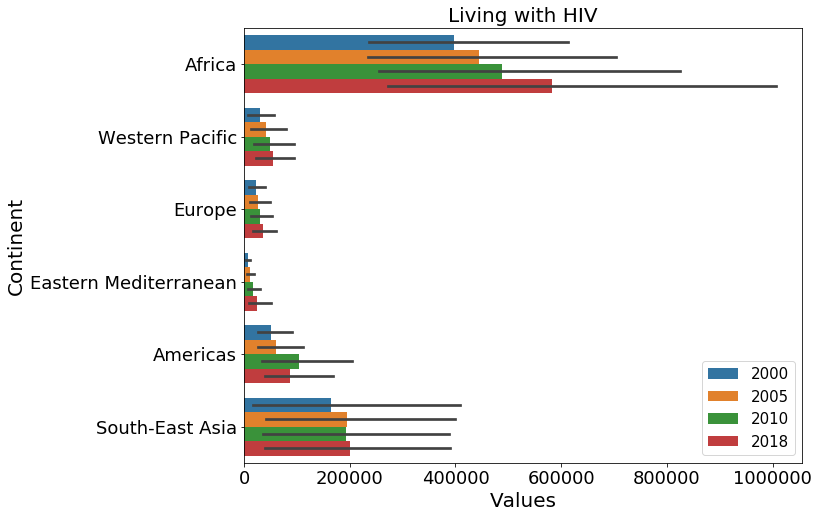

In [398]:
living_with = dataset[dataset["gho"] == 'Estimated number of people (all ages) living with HIV']
#Plot
plt.figure(figsize=(10,8))
sns.barplot("numeric_value", "region", hue="year", data=living_with)
plt.tick_params(labelsize=18)
plt.legend(fontsize=15)
plt.xlabel("Values", fontsize=20)
plt.ylabel("Continent", fontsize=20)
plt.title("Living with HIV", fontsize=20)

### Plot HIV Cases Receiving Antiretroviral Therapy

Text(0.5, 1.0, 'Living with HIV')

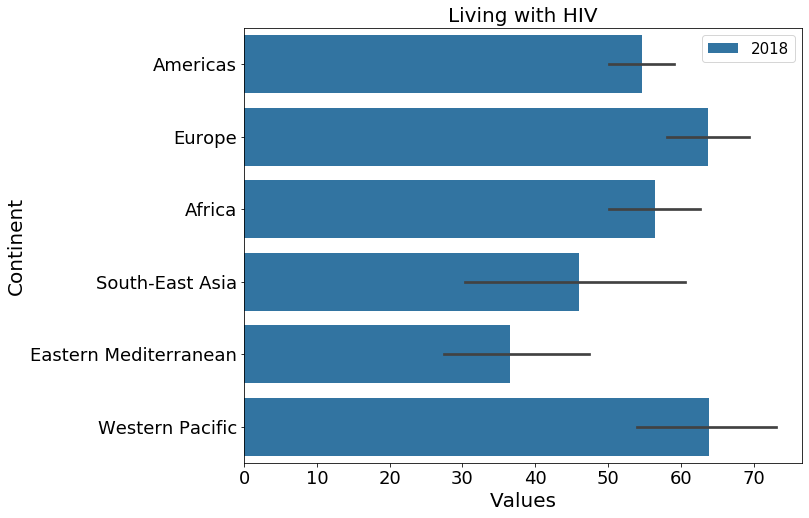

In [399]:
retroviral_hiv = dataset[dataset["gho"] == 'Estimated antiretroviral therapy coverage among people living with HIV (%)']
#Plot
plt.figure(figsize=(10,8))
sns.barplot("numeric_value", "region", hue="year", data=retroviral_hiv)
plt.tick_params(labelsize=18)
plt.legend(fontsize=15)
plt.xlabel("Values", fontsize=20)
plt.ylabel("Continent", fontsize=20)
plt.title("Living with HIV", fontsize=20)

## Attempting to do Regression

### Columns to Dummies

In [263]:
dataset["gho"].unique()

array(['Estimated antiretroviral therapy coverage among people living with HIV (%)',
       'Estimated number of people (all ages) living with HIV',
       'Reported number of people receiving antiretroviral therapy'],
      dtype=object)

In [264]:
dataset["year"].unique()

array(['2018', '2010', '2005', '2000'], dtype=object)

In [265]:
dataset["region"].unique()

array(['Americas', 'Africa', 'Europe', 'Eastern Mediterranean',
       'Western Pacific', 'South-East Asia', '(WHO) Global'], dtype=object)

In [412]:
#Useful columns
columns = ['gho', 'year', 'region', 'country', 'numeric_value', 'low_range', 'high_range']
dataset = dataset[columns]

In [414]:
#Turning into dummies and float
gho_dummies = pd.get_dummies(dataset["gho"]).astype(float)
year_dummies = pd.get_dummies(dataset["year"]).astype(float)
region_dummies = pd.get_dummies(dataset["region"]).astype(float)
country_dummies = pd.get_dummies(dataset["country"]).astype(float)

## Merging dummies into DF: data_clean

In [415]:
data_clean = pd.concat([data, gho_dummies, year_dummies, region_dummies, country_dummies], axis=1)

In [416]:
data_clean.shape

(1041, 155)

In [418]:
#drop null
data_clean = data_clean.replace("", np.nan).dropna()
data_clean.shape

(644, 155)

In [419]:
#Turn into float
data_clean[['numeric_value', 'low_range', 'high_range']] = data_clean[['numeric_value', 'low_range', 'high_range']].replace(" ", "").astype(float)

In [420]:
data_clean.head()

,numeric_value,low_range,high_range,Estimated antiretroviral therapy coverage among people living with HIV (%),Estimated number of people (all ages) living with HIV,2000,2005,2010,2018,Africa,...,Ukraine,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
5,64000.0,55000.0,71000.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,950.0,580.0,1600.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,13000.0,11000.0,15000.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,410000.0,320000.0,510000.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,140000.0,110000.0,170000.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Preparing Regression

In [423]:
y = data_clean.iloc[:, :1]
x = data_clean.iloc[:, 1:]

In [424]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [425]:
#Splitting df into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)
print("x_train: \n", x_train.shape)
print("x_test: \n", x_test.shape)
print("y_train: \n", y_train.shape)
print("y_test: \n", y_test.shape)

x_train: 
 (483, 154)
x_test: 
 (161, 154)
y_train: 
 (483, 1)
y_test: 
 (161, 1)


In [426]:
#Fitting and predicting
lr = LinearRegression()
lr.fit(x_train, y_train)
predicted = pd.DataFrame(lr.predict(x_test))
lr.score(x_train, y_train)

0.9998930652122401

In [427]:
mean_squared_error(y_test, predicted)

2.14965245795703e+16

In [429]:
#True labels / predicted
pd.concat([y_test.reset_index(), predicted.reset_index()], axis=1)

,index,numeric_value,index,0
0,187,75.0,0,332.534927
1,619,5600.0,1,5829.990356
2,539,68000.0,2,65405.143696
3,79,19000.0,3,20627.054661
4,63,130000.0,4,133558.794685
...,...,...,...,...
156,444,31.0,156,-372.754230
157,785,940.0,157,-1081.842190
158,269,1400.0,158,-683.254101
159,791,110000.0,159,111446.080582
